<a href="https://colab.research.google.com/github/Taiba528/word-cloud/blob/master/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#Importing necessary libraries
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
# importing some more libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [59]:
from google.colab import files
uploaded=files.upload()

Saving TweetSent.csv to TweetSent (1).csv


In [0]:
df = pd.read_csv("TweetSent.csv")

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [73]:
#Explore Data
df.shape
type(df)
df.size
df.shape
df.head()
df.tail()

(5968, 2)

pandas.core.frame.DataFrame

11936

(5968, 2)

,Tweet,Category
0,Not Available,negative
1,IOS 9 App Transport Security. Mm need to check...,neutral
2,"Mar if you have an iOS device, you should down...",neutral
3,@jimmie_vanagon my phone does not run on lates...,negative
4,Not sure how to start your publication on iOS?...,positive


,Tweet,Category
5963,"Ok ed let's do this, Zlatan, greizmann and Lap...",positive
5964,Goal level: Zlatan 90k by Friday? = Posting e...,neutral
5965,@YouAreMyArsenal Wouldn't surprise me if we en...,neutral
5966,Rib injury for Zlatan against Russia is a big ...,neutral
5967,Noooooo! I was hoping to see Zlatan being Zlat...,neutral


In [65]:
df.Category.value_counts()

positive    2888
neutral     2123
negative     956
Tweet          1
Name: Category, dtype: int64

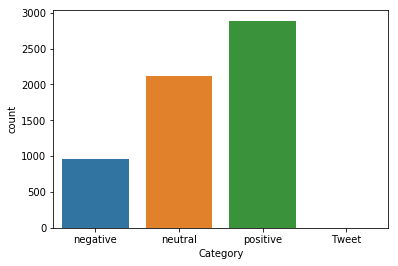

In [90]:
sns.countplot(x = 'Category',data=df)

Text(0.5, 1.0, 'Positive Tweets')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Negative Tweets')

(-0.5, 399.5, 199.5, -0.5)

Text(0.5, 1.0, 'Neutral Tweets')

(-0.5, 399.5, 199.5, -0.5)

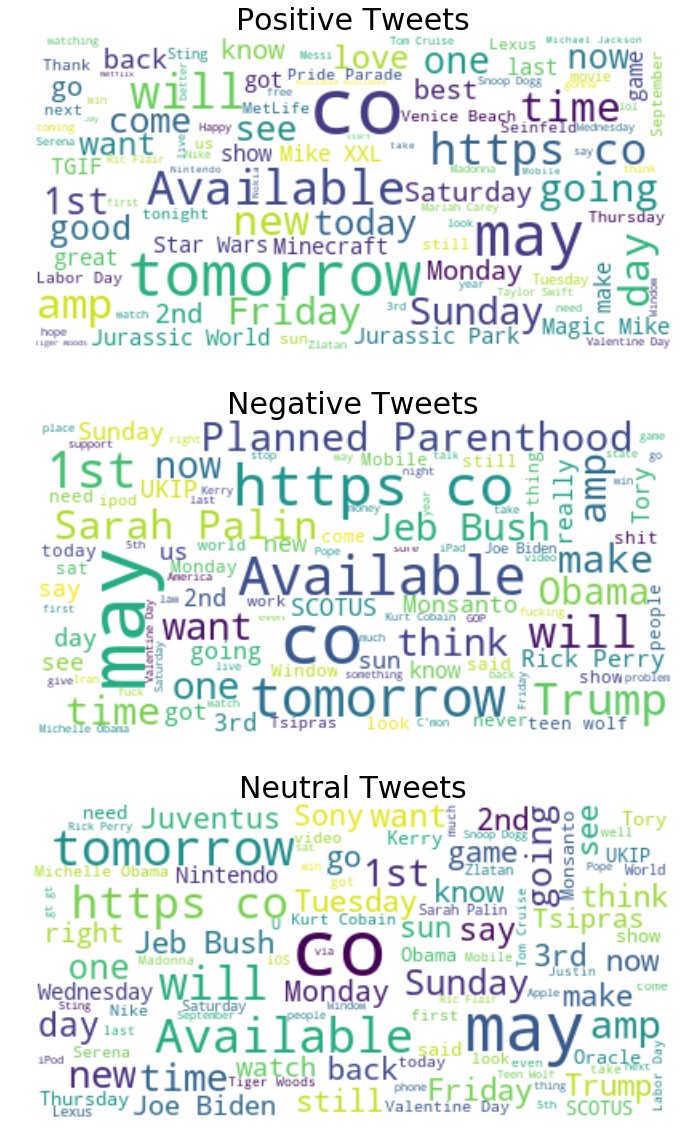

In [67]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
df_positive=df[df['Category'] == 'positive']
df_negative=df[df['Category']=='negative']
df_neutral=df[df['Category']=='neutral']
tweet_all=" ".join(review for review in df.Tweet)
tweet_positive=" ".join(review for review in df_positive.Tweet)
tweet_negative=" ".join(review for review in df_negative.Tweet)
tweet_neutral=" ".join(review for review in df_neutral.Tweet)

fig, ax = plt.subplots(3, 1, figsize  = (20,20))
# Create and generate a word cloud image:
#wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweets)
wordcloud_positive = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_positive)
wordcloud_negative = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_negative)
wordcloud_neutral = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_neutral)
# Display the generated image:
ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].set_title('Positive Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].set_title('Negative Tweets',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_neutral, interpolation='bilinear')
ax[2].set_title('Neutral Tweets',fontsize=30)
ax[2].axis('off')


In [68]:
# Remove punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [76]:
import re
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text
df['Tweet_punct'] = df['Tweet'].apply(lambda x: remove_punct(x))
df.head(10)

,Tweet,Category,Tweet_punct
0,Not Available,negative,Not Available
1,IOS 9 App Transport Security. Mm need to check...,neutral,IOS App Transport Security Mm need to check i...
2,"Mar if you have an iOS device, you should down...",neutral,Mar if you have an iOS device you should downl...
3,@jimmie_vanagon my phone does not run on lates...,negative,jimmievanagon my phone does not run on latest ...
4,Not sure how to start your publication on iOS?...,positive,Not sure how to start your publication on iOS ...
5,"Two Dollar Tuesday is here with Forklift 2, Qu...",neutral,Two Dollar Tuesday is here with Forklift Quic...
6,If you're not already signed up to test my iOS...,neutral,If youre not already signed up to test my iOS ...
7,"YouTube Gaming Officially Launches On Web, And...",neutral,YouTube Gaming Officially Launches On Web Andr...
8,YouTube Gaming Launches Tomorrow with iOS and ...,neutral,YouTube Gaming Launches Tomorrow with iOS and ...
9,@astrill Yashan from BBC @bbcchinese the VPN a...,neutral,astrill Yashan from BBC bbcchinese the VPN acc...


In [21]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,Tweet,Category,Tweet_punct,Tweet_tokenized
0,Not Available,negative,Not Available,"[not, available]"
1,IOS 9 App Transport Security. Mm need to check...,neutral,IOS App Transport Security Mm need to check i...,"[ios, app, transport, security, mm, need, to, ..."
2,"Mar if you have an iOS device, you should down...",neutral,Mar if you have an iOS device you should downl...,"[mar, if, you, have, an, ios, device, you, sho..."
3,@jimmie_vanagon my phone does not run on lates...,negative,jimmievanagon my phone does not run on latest ...,"[jimmievanagon, my, phone, does, not, run, on,..."
4,Not sure how to start your publication on iOS?...,positive,Not sure how to start your publication on iOS ...,"[not, sure, how, to, start, your, publication,..."


## Few high frequency tokens such as 'tomorrow', 'may', 'co','https' are frequently used in all the categorical classes Removing these words along with stops words would not impact the performance

In [0]:
stopword = nltk.corpus.stopwords.words('english')
stopword.extend([ 'tomorrow', 'may', 'co','https'])

In [23]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,Tweet,Category,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,Not Available,negative,Not Available,"[not, available]",[available]
1,IOS 9 App Transport Security. Mm need to check...,neutral,IOS App Transport Security Mm need to check i...,"[ios, app, transport, security, mm, need, to, ...","[ios, app, transport, security, mm, need, chec..."
2,"Mar if you have an iOS device, you should down...",neutral,Mar if you have an iOS device you should downl...,"[mar, if, you, have, an, ios, device, you, sho...","[mar, ios, device, download, app, httptcogltnu..."
3,@jimmie_vanagon my phone does not run on lates...,negative,jimmievanagon my phone does not run on latest ...,"[jimmievanagon, my, phone, does, not, run, on,...","[jimmievanagon, phone, run, latest, ios, accou..."
4,Not sure how to start your publication on iOS?...,positive,Not sure how to start your publication on iOS ...,"[not, sure, how, to, start, your, publication,...","[sure, start, publication, ios, well, live, he..."


In [24]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,Tweet,Category,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,Not Available,negative,Not Available,"[not, available]",[available],[avail]
1,IOS 9 App Transport Security. Mm need to check...,neutral,IOS App Transport Security Mm need to check i...,"[ios, app, transport, security, mm, need, to, ...","[ios, app, transport, security, mm, need, chec...","[io, app, transport, secur, mm, need, check, r..."
2,"Mar if you have an iOS device, you should down...",neutral,Mar if you have an iOS device you should downl...,"[mar, if, you, have, an, ios, device, you, sho...","[mar, ios, device, download, app, httptcogltnu...","[mar, io, devic, download, app, httptcogltnudnd]"
3,@jimmie_vanagon my phone does not run on lates...,negative,jimmievanagon my phone does not run on latest ...,"[jimmievanagon, my, phone, does, not, run, on,...","[jimmievanagon, phone, run, latest, ios, accou...","[jimmievanagon, phone, run, latest, io, accoun..."
4,Not sure how to start your publication on iOS?...,positive,Not sure how to start your publication on iOS ...,"[not, sure, how, to, start, your, publication,...","[sure, start, publication, ios, well, live, he...","[sure, start, public, io, well, live, help, as..."


In [26]:
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

,Tweet,Category,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,Not Available,negative,Not Available,"[not, available]",[available],[avail],[available]
1,IOS 9 App Transport Security. Mm need to check...,neutral,IOS App Transport Security Mm need to check i...,"[ios, app, transport, security, mm, need, to, ...","[ios, app, transport, security, mm, need, chec...","[io, app, transport, secur, mm, need, check, r...","[io, app, transport, security, mm, need, check..."
2,"Mar if you have an iOS device, you should down...",neutral,Mar if you have an iOS device you should downl...,"[mar, if, you, have, an, ios, device, you, sho...","[mar, ios, device, download, app, httptcogltnu...","[mar, io, devic, download, app, httptcogltnudnd]","[mar, io, device, download, app, httptcogltnudnd]"
3,@jimmie_vanagon my phone does not run on lates...,negative,jimmievanagon my phone does not run on latest ...,"[jimmievanagon, my, phone, does, not, run, on,...","[jimmievanagon, phone, run, latest, ios, accou...","[jimmievanagon, phone, run, latest, io, accoun...","[jimmievanagon, phone, run, latest, io, accoun..."
4,Not sure how to start your publication on iOS?...,positive,Not sure how to start your publication on iOS ...,"[not, sure, how, to, start, your, publication,...","[sure, start, publication, ios, well, live, he...","[sure, start, public, io, well, live, help, as...","[sure, start, publication, io, well, live, hel..."


In [93]:
df=df.loc[:,['Tweet_lemmatized','Category']]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [94]:
df.head()

,Tweet_lemmatized,Category
0,NaN,negative
1,NaN,neutral
2,NaN,neutral
3,NaN,negative
4,NaN,positive


In [0]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(data['Tweet'])
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))



3844 Number of tweets has 9078 words


In [98]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,a,aa,aaa,aaaah,aampm,aapl,aaunti,ab,abandon,abbott,abc,abdel,abercrombi,abhorr,abid,abil,abiwilk,abl,abort,abraham,abrupt,absentia,absolut,abt,abus,abuseofpow,acc,accept,access,accessori,accid,accident,accolad,accompani,accord,account,accur,accus,acdc,...,ysengrim,yummi,yup,yuriofwind,yurt,yyc,yycprid,z,zac,zacb,zachlowenba,zambia,zanotti,zar,zarifal,zarra,zaterdag,zayn,zaza,zdoginthehous,zeiss,zen,zenofamili,zero,zeu,ziggler,zion,zip,zirelhomz,zjdarevalo,zlatan,zlatanfact,zlatanibra,zohan,zombi,zondag,zone,zoo,zourrysschees,zumiez
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
positive_tweet = data[data['Category'] == 'positive']['Tweet'].apply(lambda x: len(x) - len(' '))
negative_tweet = data[data['Category'] == 'negative']['Tweet'].apply(lambda x: len(x) - len(' '))


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.        , 0.01534395, 0.        , 0.        , 0.00026547,
        0.00069021, 0.00106187, 0.0015397 , 0.00254848, 0.00329178,
        0.00339797, 0.00424746, 0.00430055, 0.00759234, 0.00637119,
        0.00822946, 0.00748615, 0.0094506 , 0.00939751, 0.01428209,
        0.02771468, 0.02553786, 0.00047784, 0.00010619, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([  0.        ,   6.52173913,  13.04347826,  19.5652

(array([0.        , 0.01395397, 0.        , 0.        , 0.        ,
        0.00016039, 0.00112273, 0.00032078, 0.00128312, 0.00208508,
        0.00224547, 0.00304742, 0.00288703, 0.0051325 , 0.00433054,
        0.0085007 , 0.0051325 , 0.01058577, 0.00882148, 0.01700139,
        0.03159693, 0.03432357, 0.00080195, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([  0.        ,   6.52173913,  13.04347826,  19.5652

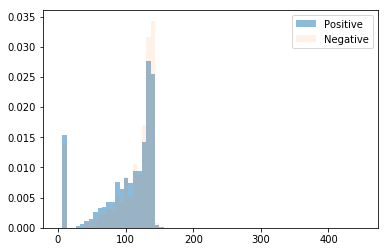

In [100]:
bins_ = np.linspace(0, 450, 70)

plt.hist(positive_tweet, bins= bins_, normed=True, alpha = 0.5, label = 'Positive')
plt.hist(negative_tweet, bins= bins_, normed=True, alpha = 0.1, label = 'Negative')
plt.legend()

In [0]:
# Splitting up training and test sets by choosing random samples from classes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Tweet_lemmatized'], df['Category'], test_size=0.33, random_state=0)

data_train = pd.DataFrame()
data_test = pd.DataFrame()

data_train['Tweet_lemmatized'] = X_train
data_train['Category'] = y_train
data_train = data_train.reset_index(drop=True)

data_test['Tweet_lemmatized'] = X_test
data_test['Category'] = y_test
data_test = data_test.reset_index(drop=True)

In [0]:
# Define number of classes and number of tweets per class
n_class = 2
n_tweet = 5968

# Divide into number of classes
if n_class == 2:
    data_pos = data.copy()[data.Category == 'positive'][:n_tweet]
    data_neg = data.copy()[data.Category == 'negative'][:n_tweet]
    data_neu = pd.DataFrame()
    data = pd.concat([data_pos, data_neg], ignore_index=True).reset_index(drop=True)
elif n_class == 3:
    data_pos = data.copy()[data.Category == 'positive'][:n_tweet]
    data_neg = data.copy()[data.Category == 'negative'][:n_tweet]
    data_neu = data.copy()[data.Category == 'neutral'][:n_tweet]
    data = pd.concat([data_pos, data_neg, data_neu], ignore_index=True).reset_index(drop=True)


In [0]:
# Start training (input training set df_train)
class TweetNBClassifier(object):

    def __init__(self, data_train):
        self.data_train = data_train
        self.data_pos = data_train.copy()[data_train.Category == 'positive']
        self.data_neg = data_train.copy()[data_train.Category == 'negative']
        self.data_neu = data_train.copy()[data_train.Category == 'neutral']

    def fit(self):
        Pr_pos = data_pos.shape[0]/self.data_train.shape[0]
        Pr_neg = data_neg.shape[0]/self.data_train.shape[0]
        Pr_neu = data_neu.shape[0]/self.data_train.shape[0]
        self.Prior  = (Pr_pos, Pr_neg, Pr_neu)

        self.pos_words = ' '.join(self.data_pos['Tweet_lemmatized'].tolist()).split()
        self.neg_words = ' '.join(self.data_neg['Tweet_lemmatized'].tolist()).split()
        self.neu_words = ' '.join(self.data_neu['Tweet_lemmatized'].tolist()).split()

        all_words = ' '.join(self.data_train['Tweet_lemmatized'].tolist()).split()

        self.vocab = len(Counter(all_words))

        wc_pos = len(' '.join(self.data_pos['Tweet_lemmatized'].tolist()).split())
        wc_neg = len(' '.join(self.data_neg['Tweet_lemmatized'].tolist()).split())
        wc_neu = len(' '.join(self.data_neu['Tweet_lemmatized'].tolist()).split())
        self.word_count = (wc_pos, wc_neg, wc_neu)
        return self
        def predict(self, data_test):
          class_choice = ['positive', 'negative', 'neutral']

        classification = []
        for tweet in data_test['Tweet_lemmatized']:
            text = tweet.split()

            val_pos = np.array([])
            val_neg = np.array([])
            val_neu = np.array([])
            for word in text:
                tmp_pos = np.log((self.pos_words.count(word)+1)/(self.word_count[0]+self.vocab))
                tmp_neg = np.log((self.neg_words.count(word)+1)/(self.word_count[1]+self.vocab))
                tmp_neu = np.log((self.neu_words.count(word)+1)/(self.word_count[2]+self.vocab))
                val_pos = np.append(val_pos, tmp_pos)
                val_neg = np.append(val_neg, tmp_neg)
                val_neu = np.append(val_neu, tmp_neu)

            val_pos = np.log(self.Prior[0]) + np.sum(val_pos)
            val_neg = np.log(self.Prior[1]) + np.sum(val_neg)
            val_neu = np.log(self.Prior[2]) + np.sum(val_neu)
            
            probability = (val_pos, val_neg, val_neu)
            classification.append(class_choice[np.argmax(probability)])
        return classification


    def score(self, feature, target):

        compare = []
        for i in range(0,len(feature)):
            if feature[i] == target[i]:
                tmp ='correct'
                compare.append(tmp)
            else:
                tmp ='incorrect'
                compare.append(tmp)
        r = Counter(compare)
        accuracy = r['correct']/(r['correct']+r['incorrect'])
        return accuracy

In [104]:
tnb = TweetNBClassifier(data_train)
tnb = tnb.fit()
predict = tnb.predict(data_test)
score = tnb.score(predict,data_test.Category.tolist())
print(score)

TypeError: ignored

In [38]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(data_train['Tweet_lemmatized'], data_train['Category'])

#data_train['Tweet_lemmatized'] = X_train
#data_train['Category'] = y_train

ValueError: ignored

# NaiveBayes Classifier

In [0]:
from textblob.classifiers import NaiveBayesClassifier

In [0]:
# Create Features and Labels 
y = df.iloc[:,1]
x= df.iloc[:,-1]

In [108]:
x.head()
y.head()


0    negative
1     neutral
2     neutral
3    negative
4    positive
Name: Category, dtype: object

0    negative
1     neutral
2     neutral
3    negative
4    positive
Name: Category, dtype: object

In [109]:
# Create train and test data 85% and 15% split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.15, random_state=1)
train_x.shape
test_x.shape


(5072,)

(896,)

In [0]:
from textblob.classifiers import NaiveBayesClassifier

In [111]:
cl = NaiveBayesClassifier(df)

ValueError: ignored

In [0]:
cl.accuracy(train_x)

ValueError: ignored

# K-Means Clustering

In [0]:
#Text clustering with K-means
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [79]:
#Transform the data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(x)
print(X)

  (0, 773)	1.0
  (1, 6090)	0.3508425888138665
  (1, 13170)	0.3238255367803298
  (1, 10653)	0.3508425888138665
  (1, 9720)	0.2881109366561641
  (1, 10343)	0.20334484069960782
  (1, 11223)	0.16727750181519915
  (1, 1910)	0.22779102481672614
  (1, 9687)	0.19759037819347108
  (1, 9360)	0.3238255367803298
  (1, 12098)	0.29680848474679333
  (1, 13893)	0.33503862649421534
  (1, 516)	0.24528992230297642
  (1, 7649)	0.20077397278318956
  (2, 6140)	0.5163874418946417
  (2, 3290)	0.4185880675696823
  (2, 3015)	0.4007948475214996
  (2, 8899)	0.4240558994412071
  (2, 516)	0.361029816616047
  (2, 7649)	0.29550904454059823
  (3, 11448)	0.4007180499400887
  (3, 13672)	0.18331640142762104
  (3, 2784)	0.1673383556933265
  (3, 10897)	0.3360913499127376
  (3, 52)	0.3360913499127376
  :	:
  (5966, 11868)	0.3004550666178457
  (5966, 13736)	0.3004550666178457
  (5966, 13135)	0.3004550666178457
  (5966, 749)	0.3004550666178457
  (5966, 9322)	0.2773181658328027
  (5966, 15034)	0.17649791743628934
  (5966, 1251

In [81]:
#Build the clusters
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [82]:
#Profile the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:


(None,)

 make


(None,)

 monsanto


(None,)

 people


(None,)

 sunday


(None,)

 day


(None,)

 valentines


(None,)

 ric


(None,)

 flairs


(None,)

 tomorrow


(None,)

 just


(None,)

<function print>

Cluster 1:


(None,)

 available


(None,)

 zurich


(None,)

 hardtimes


(None,)

 harpersbazaarus


(None,)

 harpers


(None,)

 harper


(None,)

 harnanes


(None,)

 harmony


(None,)

 harmonicraftmc


(None,)

 harm


(None,)

<function print>

Cluster 2:


(None,)

 tomorrow


(None,)

 th


(None,)

 just


(None,)

 day


(None,)

 im


(None,)

 time


(None,)

 going


(None,)

 st


(None,)

 like


(None,)

 friday


(None,)

<function print>

In [85]:
#Use model for prediction
print("\n")
print("Prediction")
 
Y = vectorizer.transform(["Mar if you have an iOS device, you should download our app too: http://t.co/gl3tn2uDnD"])
prediction = model.predict(Y)
print(prediction)



Prediction
[2]


In [88]:
Y = vectorizer.transform(["Who's ready for 0.12.1 Build 12 Tomorrow, Might be the last build till it come to iOS !"])
prediction = model.predict(Y)
print(prediction)

[2]


In [87]:
Y = vectorizer.transform(["@jimmie_vanagon my phone does not run on latest IOS which may account for problem the other day .. time it was replaced"])
prediction = model.predict(Y)
print(prediction)

[2]
